# Extracción de datos web

## Índice
1. [Recepción de páginas web con urllib](#urllib)
2. [Parsing de HTML mediante BeatifulSoup](#bea)
3. [Ejemplos de web scraping](#ejemplos)
4. [Web scraping con selenium](#sele)

<a id="urllib"></a>
## Recepción de páginas web con urllib

 <!DOCTYPE html><html lang="es"><head><script>/\/radio(\/parrilla)?.html/gmi.test(location.href||"")&&/MSIE|Trident/gm.test(navigator.userAgent||"")&&!!window.MSInputMethodContext&&!!document.documentMode&&function(){var a=document.createElement("script");a.src="//e00-elmundo.uecdn.es/js/ue-polyfills.min.js",a.type="text/javascript";var b=document.getElementsByTagName("script")[0];b.parentNode.insertBefore(a,b)}();</script>
<script type="text/javascript" language="javascript" src="https://e00-ue.uecdn.es/cookies/js/policy_v4.js"></script>
<script>window.googlefc=window.googlefc||{},window.googlefc.ccpa=window.googlefc.ccpa||{},window.googlefc.callbackQueue=window.googlefc.callbackQueue||[],googlefc.callbackQueue.push({AD_BLOCK_DATA_READY:()=>{var o;switch(googlefc.getAdBlockerStatus()){case googlefc.AdBlockerStatusEnum.EXTENSION_LEVEL_AD_BLOCKER:case googlefc.AdBlockerStatusEnum.NETWORK_LEVEL_AD_BLOCKER:o="bloqueada";break;case googlefc.AdBlockerStatusEnum.NO_AD_BLOCKER:o="no bloqueada

Puede ocurrir que urllib devuelva un error de fallo en la verificación del certificado SSL:  

`urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed`

SSL (*Secure Sockets Layer*) es un certificado que asegura que una página web es de confianza. 

Para ignorar la autenticación de certificado SSL no verificado en urllib tenemos dos opciones:

In [7]:
import ssl
import urllib.request
context = ssl._create_unverified_context()

urllib.request.urlopen('https://www.elpais.com',context=context).read().decode()

'<!DOCTYPE html><html lang="es-ES"><head><link rel="preconnect" href="//static.elpais.com"/><link rel="preconnect" href="//ep00.epimg.net"/><link rel="preconnect" href="//imagenes.elpais.com"/><link rel="preconnect" href="//www.googletagservices.com"/><link rel="preconnect" href="//ping.chartbeat.net"/><link rel="preconnect" href="//cdn.krxd.net"/><link rel="preconnect" href="//assets.adobedtm.com"/><link rel="preload" href="https://static.elpais.com/dist/resources/fonts/majrit/majrit-text/Majrit-Text-Bold.woff2" as="font" type="font/woff2" crossorigin=""/><link rel="preload" href="https://static.elpais.com/dist/resources/fonts/majrit/majrit-text/Majrit-Text-Roman.woff2" as="font" type="font/woff2" crossorigin=""/><link rel="preload" href="https://static.elpais.com/dist/resources/fonts/marcin-ant-b/marcinantb-regular-webfont.woff2" as="font" type="font/woff2" crossorigin=""/><link rel="preload" href="https://static.elpais.com/dist/resources/fonts/majrit/majrit-text/Majrit-Text-Bold-Ita

In [8]:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

<a id="bea"></a>
## Parsing de HTML mediante BeatifulSoup

BeautifulSoup es una librería de Python que permite analizar documentos HTML y extraer datos de ellos, compensando imperfecciones que puedan existir. Para instalar esta librería escribimos en anaconda Prompt:  
`conda install -c anaconda beautifulsoup4`

Esta librería permite, por ejemplo, extraer los atributos href de las etiquetas de anclaje (a)  
<img src='http://www.cellbiol.com/bioinformatics_web_development/wp-content/uploads/2017/01/attributes_and_values_in_the_a_tag.png'>  
En el siguiente ejemplo, vamos a parsear una entrada HTML y extraer los links utilizando la librería BeautifulSoup. 
Utilizaremos urllib para leer la página y después BeautifulSoup para extraer los atributos href de las etiquetas de tipo ancla (a)

https://www.marca.com/futbol/laliga-santander/r-madrid-rayo/2023/05/24/01_0101_20230524_186_184-directo.html
https://www.marca.com/futbol/mercado-fichajes/2023/05/24/646dbca5c83c250028c04978-directo.html
https://www.marca.com/futbol/laliga-santander/villarreal-cadiz/2023/05/24/01_0101_20230524_449_1737-directo.html
https://www.marca.com/futbol/laliga-santander/elche-sevilla/2023/05/24/01_0101_20230524_954_179-directo.html
https://www.marca.com/futbol/real-madrid/2023/05/24/646dd411c83c250028c0599c-directo.html
https://www.marca.com/tenis/2023/05/24/646e12d3e2704e308e8b45c3.html
https://www.marca.com/tiramillas/actualidad/2023/05/24/646e0b9322601d6b0c8b45df.html
https://www.marca.com/futbol/real-madrid/2023/05/24/646e459522601d6b0c8b460c.html
https://www.marca.com/futbol/primera-division/2023/05/24/646db6fc46163fe2468b4584.html
https://www.marca.com/futbol/primera-division/2023/05/24/646d04db268e3e6a798b4581.html
https://www.marca.com/futbol/primera-division/2023/05/23/646cd23322601d702

Podemos extraer más campos de las etiquetas

URL: https://www.marca.com/futbol/laliga-santander/r-madrid-rayo/2023/05/24/01_0101_20230524_186_184-directo.html
Texto: Real Madrid - Rayo
Atributos {'href': 'https://www.marca.com/futbol/laliga-santander/r-madrid-rayo/2023/05/24/01_0101_20230524_186_184-directo.html'}

URL: https://www.marca.com/futbol/mercado-fichajes/2023/05/24/646dbca5c83c250028c04978-directo.html
Texto: Mercado fichajes
Atributos {'href': 'https://www.marca.com/futbol/mercado-fichajes/2023/05/24/646dbca5c83c250028c04978-directo.html'}

URL: https://www.marca.com/futbol/laliga-santander/villarreal-cadiz/2023/05/24/01_0101_20230524_449_1737-directo.html
Texto: Villarreal - Cadiz
Atributos {'href': 'https://www.marca.com/futbol/laliga-santander/villarreal-cadiz/2023/05/24/01_0101_20230524_449_1737-directo.html'}

URL: https://www.marca.com/futbol/laliga-santander/elche-sevilla/2023/05/24/01_0101_20230524_954_179-directo.html
Texto: Sevilla - Elche
Atributos {'href': 'https://www.marca.com/futbol/laliga-santander/elc

Puedes encontrar la documentación de beautifulsoup en https://www.crummy.com/software/BeautifulSoup/bs4/doc/

<a id="ejemplos"></a>
## Ejemplos de web scraping

### 1. Frecuencia de las palabras de un discurso  
Vamos a obtener la frecuencia de las palabras del siguiente discurso: https://elpais.com/internacional/2018/01/31/actualidad/1517387619_036241.html

In [11]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

,palabra,contador
11,estadounidenses,33
28,nuestro,28
542,nuestros,28
54,hemos,27
338,nuestra,27
...,...,...
767,rendición,1
766,riqueza,1
765,llevaban,1
763,sacrificaban,1


### 2. Web Scraping de bitcoin
Extraemos el valor más reciente de Bitcoin en https://www.estrategiasdeinversion.com/cotizaciones/criptomonedas/bitcoin

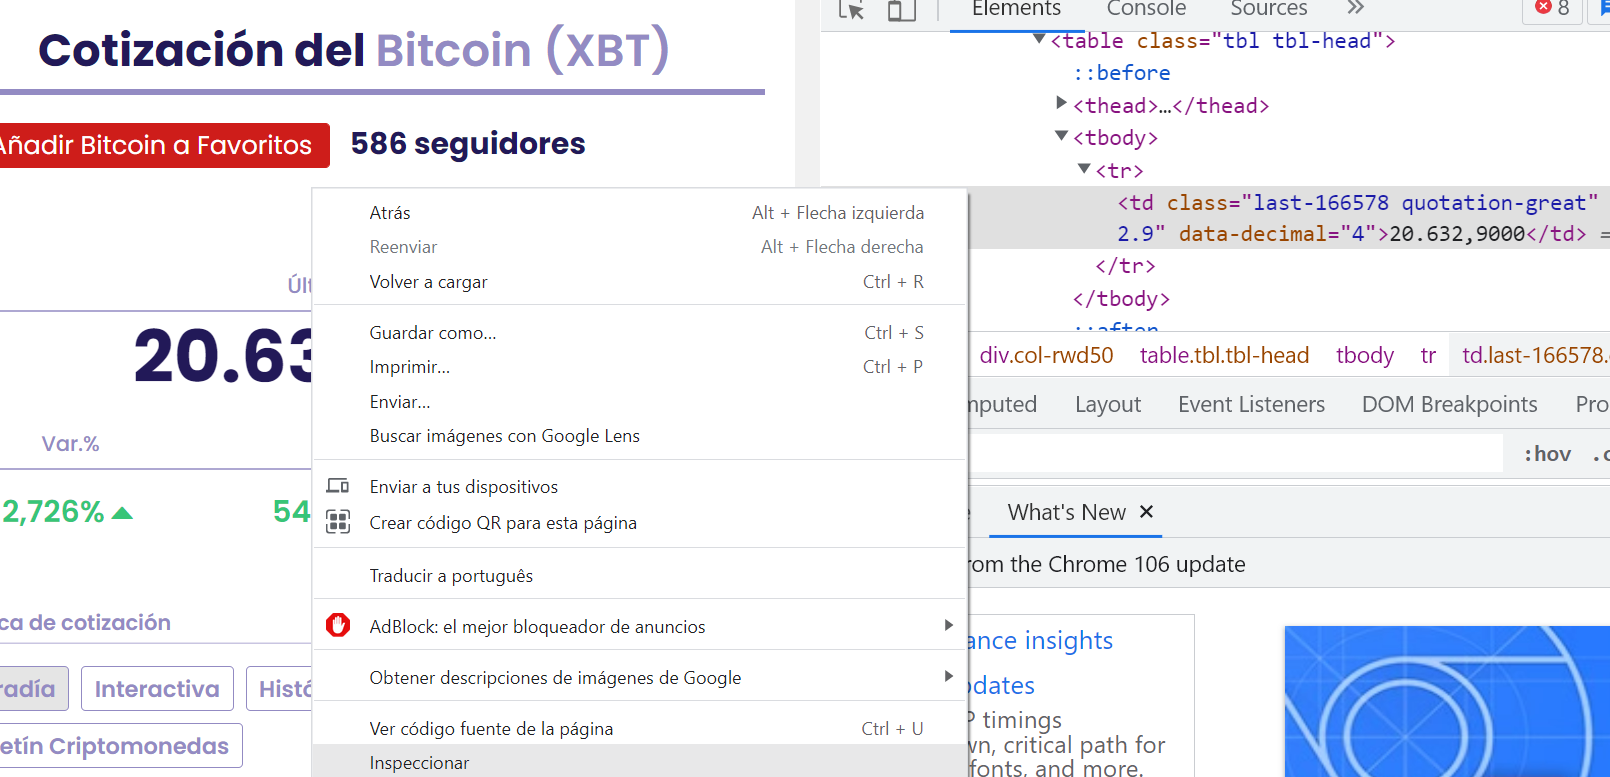

26217.3

-3.689

### 3. Web scraping con pandas 

La función `read_html()` de pandas también permite extraer tablas de páginas web, devolviendo una lista de dataframes con todas las tablas que existan.  
Por ejemplo, vamos a hacer scraping de la siguiente tabla: https://www.fdic.gov/resources/resolutions/bank-failures/failed-bank-list/

Es necesario instalar la librería `lxml`: `conda install -c conda-forge lxml`

In [ ]:
!pip install lxml

,Bank NameBank,CityCity,StateSt,CertCert,Acquiring InstitutionAI,Closing DateClosing,FundFund
0,First Republic Bank,San Francisco,CA,59017,"JPMorgan Chase Bank, N.A.","May 1, 2023",10543
1,Signature Bank,New York,NY,57053,"Flagstar Bank, N.A.","March 12, 2023",10540
2,Silicon Valley Bank,Santa Clara,CA,24735,First–Citizens Bank & Trust Company,"March 10, 2023",10539
3,Almena State Bank,Almena,KS,15426,Equity Bank,"October 23, 2020",10538
4,First City Bank of Florida,Fort Walton Beach,FL,16748,"United Fidelity Bank, fsb","October 16, 2020",10537
...,...,...,...,...,...,...,...
561,"Superior Bank, FSB",Hinsdale,IL,32646,"Superior Federal, FSB","July 27, 2001",6004
562,Malta National Bank,Malta,OH,6629,North Valley Bank,"May 3, 2001",4648
563,First Alliance Bank & Trust Co.,Manchester,NH,34264,Southern New Hampshire Bank & Trust,"February 2, 2001",4647
564,National State Bank of Metropolis,Metropolis,IL,3815,Banterra Bank of Marion,"December 14, 2000",4646


### 4. Agente de usuario

El **agente de usuario** es un identificador con el que un programa inicia sesión en el servidor web para solicitar datos

Cuando un usuario accede a una página web, la aplicación generalmente envía una cadena de texto que identifica al agente de usuario ante el servidor. Este texto forma parte de la petición a través de HTTP, llevando como prefijo
*User-Agent*, y generalmente incluye información como el nombre de la aplicación, la versión, el sistema operativo, y el idioma. 

La identificación de agente de usuario es uno de los criterios de exclusión utilizado para impedir el acceso a ciertas secciones de un sitio web.

Ejemplo: Obtenemos la altura de los futbolistas desde la web de transfermarkt:  
https://www.transfermarkt.es/lionel-messi/profil/spieler/28003


In [16]:
import urllib.request
from bs4 import BeautifulSoup
url = 'https://www.transfermarkt.es/lionel-messi/profil/spieler/28003'
req = urllib.request.Request(
    url, 
    data=None, 
    headers={
        'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.1916.47 Safari/537.36'
    }
)



1.7

## <span style="color:red">Do it yourself</span>

Obtén los equipos que hayan ganado LaLiga en los últimos 4 años con su puntuación a partir de la siguiente URL: https://resultados.as.com/resultados/futbol/primera/2021_2022/clasificacion/  

| Temporada | Club        | Puntos |
|-----------|-------------|--------|
| 19/20     | Real Madrid | 87     |
| 18/19     | Barcelona   | 87     |
| ...       | ...         | ...    |

https://resultados.as.com/resultados/futbol/primera/2018_2019/clasificacion/
https://resultados.as.com/resultados/futbol/primera/2019_2020/clasificacion/
https://resultados.as.com/resultados/futbol/primera/2020_2021/clasificacion/
https://resultados.as.com/resultados/futbol/primera/2021_2022/clasificacion/


,Temporada,Club,Puntos
0,2018_2019,Barcelona,87
1,2019_2020,Real Madrid,87
2,2020_2021,Atlético,86
3,2021_2022,Real Madrid,86


## <span style="color:red">Do it yourself</span>
Extrae el precio de la leche Pascual entera de 1L en Carrefour

In [18]:
import urllib.request
from bs4 import BeautifulSoup
url = 'https://www.carrefour.es/supermercado/leche-entera-pascual-brik-1-l/R-521006986/p?ic_source=portal-y-corporativo&ic_medium=search-empathy&ic_content=ns'


1.29

,Producto,Fecha,Precio
0,Leche Entera Pascual,2022-11-02,1.19


1

Intenta extraer el precio de alguno de estos productos: https://tienda.mercadona.es/search-results?query=leche%20entera

[]

<a id="sele"></a>
## Web Scraping con Selenium

Selenium es una librería que permite automatizar navegadores web

Documentación: https://selenium-python.readthedocs.io/

Instalar librerías `selenium` y `webdriver_manager`

In [19]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.keys import Keys
import time

In [20]:
driver = webdriver.Chrome(executable_path=ChromeDriverManager().install())

[WDM] - Downloading: 100%|████████████████████████████████████████████████████████| 6.81M/6.81M [00:00<00:00, 14.9MB/s]


### Ejemplo 1: Introducir una búsqueda en la web de carrefour y extraer el precio de los productos

In [21]:
# Accedemos a la web


In [22]:
# Aceptar cookies


In [23]:
# Buscar producto


In [25]:
# Extraer el HTML


['Leche entera Pascual botella 1,5 l.',
 'Leche entera Pascual brik 1 l.',
 'Leche semidesnatada Pascual botella 1,5 l.',
 'Leche desnatada 0% MG Pascual brik 1 l.',
 'Leche semidesnatada Pascual brik 1 l.',
 'Leche semidesnatada Pascual sin lactosa brik 1 l.',
 'Leche entera Pascual sin lactosa brik 1 l.',
 'Leche semidesnatada Salud Pascual brik 1 l.',
 'Leche desnatada 0% MG Pascual botella 1,5 l.',
 'Leche desnatada 0% MG con calcio Pascual brik 1 l.',
 'Leche desnatada Pascual sin lactosa brik 1 l.',
 'Leche semidesnatada con calcio Pascual brik 1 l.',
 'Leche entera con calcio Pascual brik 1 l.',
 'Leche semidesnatada Pascual sin lactosa pack de 6 briks de 200 ml.',
 'Leche desnatada con calcio Pascual sin lactosa brik 1 l.',
 'Mazada bebida láctea natural Pastor de Aranda Pascual brik 1 l.']

['1,82 €',
 '1,29 €',
 '1,82 €',
 '1,29 €',
 '1,29 €',
 '1,52 €',
 '1,52 €',
 '1,19 €',
 '1,82 €',
 '1,83 €',
 '1,52 €',
 '1,83 €',
 '1,83 €',
 '2,88 €',
 '1,83 €',
 '0,89 €']

In [28]:
from datetime import datetime
import pandas as pd
fecha_hoy = datetime.today().strftime('%Y-%m-%d')

df = pd.DataFrame({'Fecha':[fecha_hoy]*len(lista_precios),
                  'Producto':lista_productos,
                  'Precio':lista_precios})
df

,Fecha,Producto,Precio
0,2023-05-24,"Leche entera Pascual botella 1,5 l.","1,82 €"
1,2023-05-24,Leche entera Pascual brik 1 l.,"1,29 €"
2,2023-05-24,"Leche semidesnatada Pascual botella 1,5 l.","1,82 €"
3,2023-05-24,Leche desnatada 0% MG Pascual brik 1 l.,"1,29 €"
4,2023-05-24,Leche semidesnatada Pascual brik 1 l.,"1,29 €"
5,2023-05-24,Leche semidesnatada Pascual sin lactosa brik 1 l.,"1,52 €"
6,2023-05-24,Leche entera Pascual sin lactosa brik 1 l.,"1,52 €"
7,2023-05-24,Leche semidesnatada Salud Pascual brik 1 l.,"1,19 €"
8,2023-05-24,"Leche desnatada 0% MG Pascual botella 1,5 l.","1,82 €"
9,2023-05-24,Leche desnatada 0% MG con calcio Pascual brik ...,"1,83 €"


In [29]:
driver.get('https://tienda.mercadona.es')

In [30]:
# Aceptar Cookies
driver.find_element('xpath','//*[@id="root"]/div[1]/div/div/button[2]').click()

In [31]:
# Código Postal
driver.find_element('xpath','//*[@id="root"]/div[4]/div/div[2]/div/form/div/input').send_keys('28043')

In [32]:
# Aceptar el código postal
driver.find_element('xpath','//*[@id="root"]/div[4]/div/div[2]/div/form/button/span').click()

In [33]:
# Cuadro de búsqueda
driver.find_element('xpath','//*[@id="search"]').send_keys('Leche entera')

In [34]:
html = driver.page_source

In [35]:
soup = BeautifulSoup(html)
productos = soup.find_all('h4',class_='subhead1-r product-cell__description-name')
lista_productos = [el.text for el in productos]
lista_productos

['Leche entera Hacendado',
 'Leche entera Hacendado',
 'Leche entera Hacendado',
 'Leche entera Pascual',
 'Leche entera Asturiana',
 'Leche entera Hacendado',
 'Leche entera Asturiana',
 'Leche entera Hacendado',
 'Leche entera Pascual',
 'Leche entera Asturiana',
 'Leche entera calcio Hacendado',
 'Leche entera fresca Hacendado',
 'Leche entera sin lactosa Hacendado',
 'Leche entera Asturiana',
 'Leche entera calcio Hacendado',
 'Leche entera sin lactosa Hacendado',
 'Leche condensada entera Nutricia',
 'Leche condensada entera Nutricia',
 'Leche condensada entera Nutricia',
 'Chocolate extrafino con leche Hacendado almendras enteras',
 'Chocolate con leche Valor almendras enteras',
 'Chocolate con leche Valor almendras enteras',
 'Chocolate con leche Hacendado con avellanas enteras']

In [36]:
precios = soup.find_all('p',class_='product-price__unit-price subhead1-b')
lista_precios = [tag.text for tag in precios]
lista_precios

['5,46 €',
 '0,91 €',
 '1,53 €',
 '7,74 €',
 '10,68 €',
 '8,34 €',
 '6,84 €',
 '1,39 €',
 '1,29 €',
 '1,78 €',
 '5,76 €',
 '1,05 €',
 '5,94 €',
 '1,14 €',
 '0,96 €',
 '0,99 €',
 '2,65 €',
 '3,90 €',
 '2,30 €',
 '1,40 €',
 '3,15 €',
 '2,85 €',
 '1,60 €']

In [37]:
from datetime import datetime
import pandas as pd
fecha_hoy = datetime.today().strftime('%Y-%m-%d')

df2 = pd.DataFrame({'Fecha':[fecha_hoy]*len(lista_precios),
                  'Producto':lista_productos,
                  'Precio':lista_precios})

df3 = df2.loc[df2.Producto.str.contains('Leche')]
df3

,Fecha,Producto,Precio
0,2023-05-24,Leche entera Hacendado,"5,46 €"
1,2023-05-24,Leche entera Hacendado,"0,91 €"
2,2023-05-24,Leche entera Hacendado,"1,53 €"
3,2023-05-24,Leche entera Pascual,"7,74 €"
4,2023-05-24,Leche entera Asturiana,"10,68 €"
5,2023-05-24,Leche entera Hacendado,"8,34 €"
6,2023-05-24,Leche entera Asturiana,"6,84 €"
7,2023-05-24,Leche entera Hacendado,"1,39 €"
8,2023-05-24,Leche entera Pascual,"1,29 €"
9,2023-05-24,Leche entera Asturiana,"1,78 €"


In [47]:
driver.quit()

### Ejemplo 3: SIAR

[Link al Notebook](./Web%20Scraping%20con%20Selenium(SIAR).ipynb)